In [ ]:
import json, os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import files
selected_file = files.upload()

Saving data.txt to data.txt


In [ ]:
with open('data.txt', 'r', encoding="utf-8") as data_file:
    complete_data = data_file.read().replace('\n', ' ')

In [ ]:
unique_characters = sorted(set(complete_data))

In [ ]:
simple_encoding = {character:value for value, character in enumerate(unique_characters)}

In [ ]:
print(simple_encoding)

{' ': 0, '!': 1, '"': 2, "'": 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'A': 12, 'B': 13, 'C': 14, 'D': 15, 'E': 16, 'F': 17, 'G': 18, 'H': 19, 'I': 20, 'J': 21, 'K': 22, 'L': 23, 'M': 24, 'N': 25, 'O': 26, 'P': 27, 'Q': 28, 'R': 29, 'S': 30, 'T': 31, 'U': 32, 'V': 33, 'W': 34, 'Y': 35, 'Z': 36, 'a': 37, 'b': 38, 'c': 39, 'd': 40, 'e': 41, 'f': 42, 'g': 43, 'h': 44, 'i': 45, 'j': 46, 'k': 47, 'l': 48, 'm': 49, 'n': 50, 'o': 51, 'p': 52, 'q': 53, 'r': 54, 's': 55, 't': 56, 'u': 57, 'v': 58, 'w': 59, 'x': 60, 'y': 61, 'z': 62}


In [ ]:
print(f"Total Number of Unique Characters: {len(unique_characters)}")

Total Number of Unique Characters: 63


In [ ]:
with open('data.txt', 'r', encoding="utf-8") as data_file:
    initial_data = []
    for line in data_file:
        initial_data.append(line.replace('\n', ''))

In [ ]:
print(f"Total Number of Characters: {len(complete_data)}")
print(f"Total Number of Lines: {len(initial_data)}")

Total Number of Characters: 203334
Total Number of Lines: 1103


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(initial_data)
word_index = tokenizer.word_index
word_count = len(word_index) + 1

In [ ]:
print(word_index)

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'a': 5, 'i': 6, 'was': 7, 'you': 8, 'in': 9, 'he': 10, 'it': 11, 'her': 12, 'they': 13, 'she': 14, 'that': 15, 'dorothy': 16, 'said': 17, 'as': 18, 'for': 19, 'so': 20, 'but': 21, 'with': 22, 'had': 23, 'is': 24, 'at': 25, 'all': 26, 'not': 27, 'them': 28, 'scarecrow': 29, 'his': 30, 'were': 31, 'me': 32, 'my': 33, 'him': 34, 'be': 35, 'woodman': 36, 'lion': 37, 'have': 38, 'when': 39, 'on': 40, 'will': 41, 'oz': 42, 'we': 43, 'this': 44, 'little': 45, 'great': 46, 'tin': 47, 'if': 48, 'are': 49, 'do': 50, 'there': 51, 'then': 52, 'one': 53, 'from': 54, 'witch': 55, 'could': 56, 'who': 57, 'asked': 58, 'would': 59, 'no': 60, 'out': 61, 'up': 62, 'green': 63, 'came': 64, 'their': 65, 'good': 66, 'back': 67, 'see': 68, 'down': 69, 'girl': 70, 'over': 71, 'toto': 72, 'head': 73, 'am': 74, 'by': 75, 'made': 76, 'what': 77, 'again': 78, 'upon': 79, 'get': 80, 'very': 81, 'where': 82, 'shall': 83, 'now': 84, 'did': 85, 'city': 86, 'into': 87, 'answered'

In [ ]:
print(f"Total Number of Words: {word_count}")

Total Number of Words: 2882


In [ ]:
print(initial_data[13])

The house whirled around two or three times and rose slowly through the air. Dorothy felt as if she were going up in a balloon.


In [ ]:
demo_sequence = tokenizer.texts_to_sequences([initial_data[13]])[0]

In [ ]:
print(demo_sequence)

[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389, 18, 48, 14, 31, 228, 62, 9, 5, 243]


In [ ]:
for i in range(1, len(demo_sequence)):
    print((demo_sequence[:i+1]))

[1, 173]
[1, 173, 1294]
[1, 173, 1294, 146]
[1, 173, 1294, 146, 278]
[1, 173, 1294, 146, 278, 145]
[1, 173, 1294, 146, 278, 145, 207]
[1, 173, 1294, 146, 278, 145, 207, 286]
[1, 173, 1294, 146, 278, 145, 207, 286, 2]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389, 18]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389, 18, 48]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389, 18, 48, 14]
[1, 173, 1294, 146, 278, 145, 207, 286, 2, 780, 546, 116, 1, 163, 16, 389, 18, 48, 14, 31]
[1, 173, 129

In [ ]:
input_sequences = []
for line in initial_data:
    partial_sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(partial_sequence)):
        input_sequences.append(partial_sequence[:i+1])

In [ ]:
padded_sequences = pad_sequences(input_sequences, padding='pre')

In [ ]:
print(np.array_str(padded_sequences[768], max_line_width=np.inf))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1  173 1294  146  278  145  207  286    2  780

In [ ]:
print(padded_sequences.shape)

(38137, 215)


In [ ]:
xs = padded_sequences[:,:-1]
ls = padded_sequences[:,-1]

In [ ]:
ys = tf.keras.utils.to_categorical(ls, num_classes=word_count)

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(word_count, 256, input_length=xs.shape[1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
        tf.keras.layers.Dense(word_count, activation='softmax'),
    ])
    return model

In [ ]:
model = create_model()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 214, 256)          737792    
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 2882)              1478466   
Total params: 3,266,882
Trainable params: 3,266,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_dir = './training_checkpoints'

In [ ]:
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
training = model.fit(xs, ys, epochs=30, verbose=1, callbacks=[checkpoint_callback])

Epoch 1/30
1192/1192 [==============================] - 56s 39ms/step - loss: 6.0837 - accuracy: 0.0876
Epoch 2/30
1192/1192 [==============================] - 47s 39ms/step - loss: 4.7831 - accuracy: 0.1610
Epoch 3/30
1192/1192 [==============================] - 47s 40ms/step - loss: 4.2322 - accuracy: 0.2012
Epoch 4/30
1192/1192 [==============================] - 48s 40ms/step - loss: 3.7614 - accuracy: 0.2394
Epoch 5/30
1192/1192 [==============================] - 48s 40ms/step - loss: 3.3158 - accuracy: 0.2876
Epoch 6/30
1192/1192 [==============================] - 47s 40ms/step - loss: 2.9187 - accuracy: 0.3416
Epoch 7/30
1192/1192 [==============================] - 48s 40ms/step - loss: 2.5020 - accuracy: 0.4235
Epoch 8/30
1192/1192 [==============================] - 48s 40ms/step - loss: 2.1067 - accuracy: 0.5101
Epoch 9/30
1192/1192 [==============================] - 48s 40ms/step - loss: 1.7856 - accuracy: 0.5910
Epoch 10/30
1192/1192 [==============================] - 48s 40m

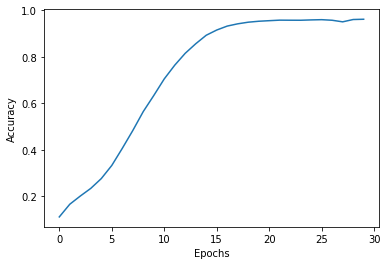

In [ ]:
  plt.plot(training.history['accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

In [ ]:
# selected_file = files.upload()
print("Skipping...")

Skipping...


In [ ]:
# model = create_model()
print("Skipping...")

Skipping...


In [ ]:
# model.load_weights('./ckpt_30')
print("Skipping...")

Skipping...


In [ ]:
def generate_text(starting_text, sentence_length):
    sentence = starting_text
    for _ in range(sentence_length):
        starting_sequence_original = tokenizer.texts_to_sequences([sentence])[0]
        starting_sequence_padded = pad_sequences(
            [starting_sequence_original],
            maxlen=xs.shape[1],
            padding='pre'
        )
        scores = model.predict(starting_sequence_padded)
        predicted = np.argmax(scores, axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                print(word, predicted, scores[0][predicted])
                break
        sentence += " " + output_word
    return sentence

In [ ]:
my_sentence = generate_text("The", 20)

scarecrow [29] [0.13397764]
was [7] [0.6146363]
now [84] [0.7873182]
the [1] [0.93392307]
ruler [767] [0.99486476]
of [4] [0.9986382]
the [1] [0.99957365]
emerald [113] [0.93001366]
city [86] [0.9999281]
and [2] [0.99625117]
although [316] [0.99830353]
he [10] [0.9791052]
was [7] [0.98450756]
not [27] [0.99316794]
a [5] [0.99812204]
wizard [167] [0.99002457]
the [1] [0.95684856]
people [112] [0.925874]
were [31] [0.99009764]
proud [646] [0.9817406]


In [ ]:
print(my_sentence)

The scarecrow was now the ruler of the emerald city and although he was not a wizard the people were proud


In [ ]:
my_sentence = generate_text("The sun", 27)

shone [813] [0.9973109]
brightly [841] [0.9919593]
as [18] [0.99218315]
our [193] [0.9917134]
friends [178] [0.9958205]
turned [368] [0.9985808]
their [65] [0.9842084]
faces [1231] [0.97666264]
toward [265] [0.9865551]
the [1] [0.99978167]
land [161] [0.95959646]
of [4] [0.9977997]
the [1] [0.9872967]
south [367] [0.89101917]
they [13] [0.9989511]
were [31] [0.9899565]
all [26] [0.9965036]
in [9] [0.998035]
the [1] [0.99005276]
best [470] [0.97443527]
of [4] [0.99967444]
spirits [1669] [0.9999645]
and [2] [0.99983513]
laughed [585] [0.9931793]
and [2] [0.9969554]
chatted [2651] [0.9999417]
together [231] [0.99536985]


In [ ]:
print(my_sentence)

The sun shone brightly as our friends turned their faces toward the land of the south they were all in the best of spirits and laughed and chatted together
